Завдання для практичної роботи з регресії:

Завдання: Прогнозування ціни житла

Ваше завдання - побудувати модель регресії для прогнозування ціни житла на основі реально згенерованих даних.

### Крок 1: Генерація даних

Згенеруйте 1000 спостережень для ознаки "Площа житла" (площа квартири в квадратних метрах) в діапазоні від 50 до 200 квадратних метрів.

Згенеруйте 1000 спостережень для ознаки "Кількість спалень" в діапазоні від 1 до 5 спалень.

Згенеруйте 1000 спостережень для ознаки "Відстань до центру міста" в діапазоні від 1 до 20 км.

Згенеруйте цільову змінну - ціну житла (в тисячах доларів) на основі ознак "Площа житла", "Кількість спалень" та "Відстань до центру міста". Модель ціни може бути, наприклад, такою: ціна = 10 * площа + 5 * спальні - 2 * відстань + похибка, де похибка - це випадковий шум.

### Крок 2: Розділення даних

Розділіть ваші дані на навчальний та тестовий набори в співвідношенні 80% - 20%.

### Крок 3: Побудова моделі регресії

Використовуйте бібліотеку Python (наприклад, Scikit-Learn) для побудови моделі лінійної регресії.

Навчіть модель на навчальних даних, використовуючи ознаки "Площа житла", "Кількість спалень" та "Відстань до центру міста" для прогнозу ціни житла.

### Крок 4: Оцінка моделі

Використайте модель для зроблення прогнозів на тестовому наборі.

Оцініть якість моделі за допомогою метрик, таких як середньоквадратична помилка (MSE) та коефіцієнт детермінації (R^2).

### Крок 5: Візуалізація результатів

Побудуйте графік, на якому відобразіть реальні ціни житла та прогнозовані моделлю ціни для тестового набору.

Додайте лінію, яка відображає ідеальні результати (реальні ціни житла) для порівняння.

### Крок 6: Висновки

Напишіть короткий звіт, де ви розповідаєте про якість моделі та її здатність прогнозувати ціну житла на основі введених ознак.

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [20]:
np.random.seed(112)
data={
    'Housing Area': np.random.randint(50, 201, size = 1000),
      'Bedrooms': np.random.randint(1, 6, size = 1000),
      'City Center': np.random.randint(1, 21, size = 1000)
}
df = pd.DataFrame(data)

noise = np.random.normal(0, 10, 1000)
y = 10 * data['Housing Area'] + 5 * data['Bedrooms'] - 2 * data['City Center'] + noise

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae, "\nMSE: ", mse)
# Як бачимо з метрик, наша модель має непогані результати

MAE:  8.204390662296271 
MSE:  104.0900110106351


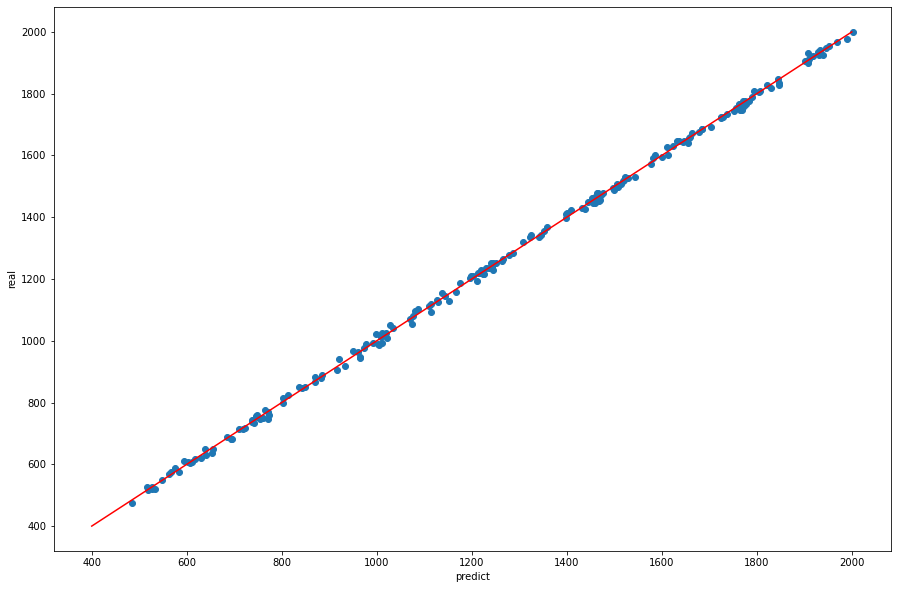

In [50]:
plt.figure(figsize=(15,10))
x = np.linspace(400, 2000)
plt.plot(x, x, label='y = x', color = "red")
plt.scatter(y_pred, y_test, label='Дані')
plt.xlabel("predict")
plt.ylabel("real")
plt.show()

In [ ]:
# З візуалізації вижче, ми бачимо якість нашої моделі(чим ближче точки до прямої y=x по осі Y, тим більш вдала наша модель)
# Як висновок, ми гарно предиктимо наші дані по цінам житла, використовуючи лінійну регресію